<a href="https://colab.research.google.com/github/iampramodyadav/FEA/blob/main/FEA_1D_Element.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# Natural Coordinate: Shape Funtion and its derivative

Pramod Kumar Yadav (@iampramodyadav)




---



- This programme calculates the values of shape functions and their derivatives.
- plot the shape funtions




## Function for shape function
- [Nptel Reference](https://nptel.ac.in/content/storage2/courses/112104116/lecture-11/11_10.htm)
- [SymPy Documentation](https://docs.sympy.org/latest/tutorial/basic_operations.html)

- **Shape Functions in Natural Coordinate**
  - ![](https://i.imgur.com/1iBlgQQ.png)
  -Here,Approximation of Order p, 
  - physical coordinate ($x$) and natural coordinate $\xi$ (here, z)

In [ ]:
from sympy import *
import numpy as np

In [ ]:
z=Symbol('z')

In [ ]:
def SHAPE(p):
  '''
  =====================================================
  SHAPE(p)
  p:  order (p) of approximation
  z:  value of natural coordinate
  This function return shape funtions values at given x
  =====================================================
  '''
  z=Symbol('z')
  n=[]

  for i in range(0, p+1):
    point=-1
    point=point+2*i/p
    n.append(point)

  shape=[1]*(p+1)

  for i in range(0,p+1):
    for j in range(0,p+1):
      if i!=j:
        shape[i]=shape[i]*((z-n[j])/(n[i]-n[j]))
        
  return shape

In [ ]:
print(SHAPE.__doc__)


  SHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return shape funtions values at given x
  




---



## Function for derivative of shape function
- [SymPy Documentation](https://docs.sympy.org/latest/tutorial/calculus.html)
- [Reference](https://stackoverflow.com/questions/47998930/differentiation-of-a-list-of-functions-with-respect-to-a-list-of-variables)



In [ ]:
def dSHAPE(p):
  '''
  =====================================================
  dSHAPE(p)
  p:  order (p) of approximation

  z:  natural coordinate variable
  This function return derivative of shape funtions values at given x
  =====================================================
  '''  
  z=Symbol('z')
  f=SHAPE(p)
  z=symbols('z')
  return [simplify(diff(f1)) for f1 in f]

In [ ]:
print(dSHAPE.__doc__)


  dSHAPE(p)
  p:  order (p) of approximation

  z:  natural coordinate variable
  This function return derivative of shape funtions values at given x
  




---



In [ ]:
df=dSHAPE(3)
print('Derivative of shape function:\n',df)

Derivative of shape function:
 [-1.6875*z**2 + 1.125*z + 0.0625000000000001, 5.0625*z**2 - 1.125*z - 1.6875, -5.0625*z**2 - 1.125*z + 1.6875, 1.6875*z**2 + 1.125*z - 0.0624999999999999]


In [ ]:
f=SHAPE(3)
print('Shape funtion:\n',f ,'\n')

print('Simplified shape funtion:\n',[simplify(f1) for f1 in f])

Shape funtion:
 [(0.25 - 0.75*z)*(0.5 - 0.5*z)*(-1.5*z - 0.5), (0.5 - 1.5*z)*(0.75 - 0.75*z)*(1.5*z + 1.5), (1.5 - 1.5*z)*(0.75*z + 0.75)*(1.5*z + 0.5), (0.5*z + 0.5)*(0.75*z + 0.25)*(1.5*z - 0.5)] 

Simplified shape funtion:
 [-0.5625*z**3 + 0.5625*z**2 + 0.0625*z - 0.0625, 1.125*(z - 1)*(z + 1)*(1.5*z - 0.5), -1.125*(z - 1)*(z + 1)*(1.5*z + 0.5), 0.5*(0.75*z + 0.25)*(z + 1)*(1.5*z - 0.5)]


In [ ]:
simplify(f[0]) #first term

-0.5625*z**3 + 0.5625*z**2 + 0.0625*z - 0.0625

In [ ]:
df[0] #deruvative of first term

-1.6875*z**2 + 1.125*z + 0.0625000000000001



---



## Visualization: Plotting shape functions

In [ ]:
import seaborn as sns

In [ ]:
def plotSHAPE(p):
  '''
  =====================================================
  plotSHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return plot of shape funtions
  =====================================================
  '''
  sns.set()
  sns.set_style("whitegrid", {'grid.linestyle': '--'})

  z=Symbol('z')
  f=SHAPE(p)
  p1=plot(0,(z,-1,1),show=False)
  for i in f:
    p2=plot(i,(z,-1,1),show=False)
    p1.append(p2[0])

  return p1.show()

In [ ]:
print(plotSHAPE.__doc__)


  plotSHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return plot of shape funtions
  


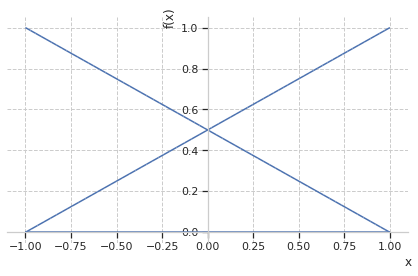

In [ ]:
plotSHAPE(1)

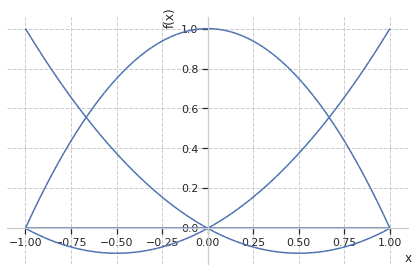

In [ ]:
plotSHAPE(2)

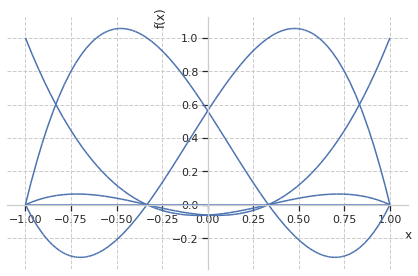

In [ ]:
plotSHAPE(3)

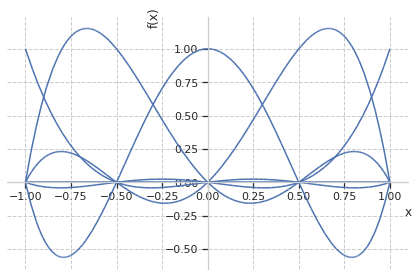

In [ ]:
plotSHAPE(4)

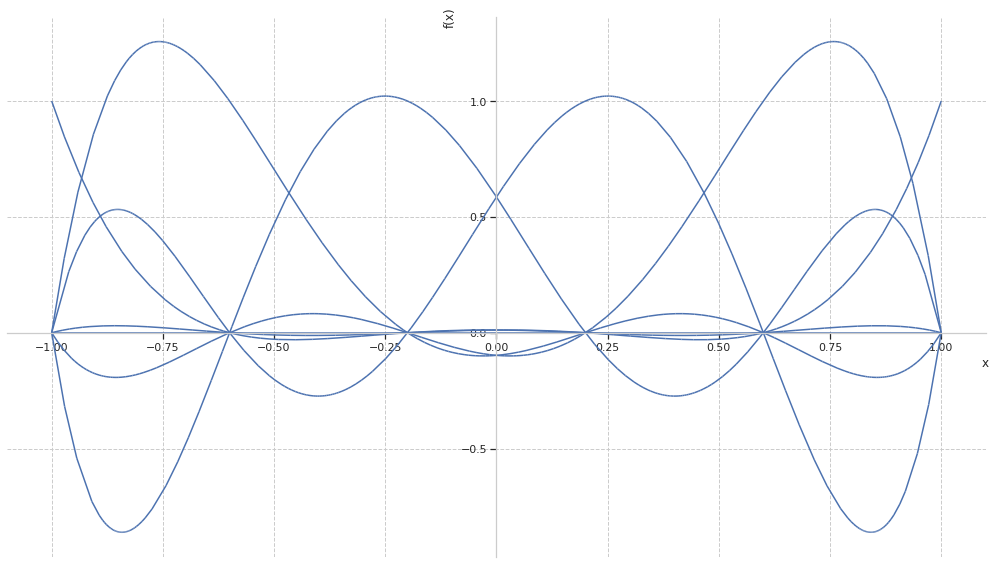

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 14, 8
plotSHAPE(5)



---



# Gauss-Legendre Quadrature implementation in Python
Pramod Kumar Yadav (@iampramodyadav)



---




* [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)

* [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials#Recurrence_relations)

* [Newton–Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method)


* **Gaussian quadrature Rule**

$${\displaystyle \int _{-1}^{1}f(x)\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})}$$

* **Bonnet’s recursion formula for Legendre Polynomial**

    * $$\boxed{\displaystyle (n+1)P_{n+1}(x)=(2n+1)xP_{n}(x)-nP_{n-1}(x)}$$

    * $${\displaystyle P_{0}(x)=1\,}$$

    * $${\displaystyle\quad P_{1}(x)=x}$$

* Recursive equation for derivative of Legendre Polynomial:
  * $$\boxed{\displaystyle {\frac {x^{2}-1}{n}}{\frac {d}{dx}}P_{n}(x)=xP_{n}(x)-P_{n-1}(x)\,}$$

* The $i-th$ Gauss node, $x_i$, is the $i-th$ root of $P_n$ and the weights are given by the formula (Abramowitz & Stegun 1972)

$$\boxed{\displaystyle w_{i}={\frac {2}{\left(1-x_{i}^{2}\right)\left[P'_{n}(x_{i})\right]^{2}}}.}$$
* Newton–Raphson method

$${\displaystyle x_{1}=x_{0}-{\frac {f(x_{0})}{f'(x_{0})}}}$$

* The first guess ${\displaystyle x_{0}}$ for the ${\displaystyle i}$-th root of a ${\displaystyle n}$-order polynomial ${\displaystyle P_{n}}$ can be given by


$${\displaystyle x_{0}=\cos \left({\frac {\pi (i-1/4)}{n+1/2}}\right)}$$



## Legendre Polynomial (symbolic)

[SymPy Documentation](https://docs.sympy.org/latest/tutorial/basic_operations.html)




In [ ]:
from sympy import *
import numpy as np

In [ ]:
x=symbols('x')

In [ ]:
def Legendre(n):
  """
  =====================================================
  n: Order of polynomial
  x: Variable
  This function print Legendre polynomial of order n (Symbolic)
  =====================================================
  """

  x=symbols('x')
  if (n==0):
    return x*0+1.0
  elif (n==1):
    return x
  else:
    return ((2.0*n-1.0)*x*Legendre(n-1)-(n-1)*Legendre(n-2))/n

In [ ]:
print(Legendre.__doc__)


  n: Order of polynomial
  x: Variable
  This function print Legendre polynomial of order n (Symbolic)
  


In [ ]:
Legendre(2)

1.5*x**2 - 0.5

## Derivative of the Legendre polynomials
[Reference](https://en.wikipedia.org/wiki/Legendre_polynomials#Recurrence_relations)

$$\boxed{\displaystyle {\frac {x^{2}-1}{n}}{\frac {d}{dx}}P_{n}(x)=xP_{n}(x)-P_{n-1}(x)\,}$$

In [ ]:
def DLegendre(n):
  """
  =====================================================
  n: Order of polynomial
  x: Variable
  This function print Derivative of Legendre polynomial of order n  (Symbolic)
  =====================================================
  """
  x=symbols('x')
  if (n==0):
    return x*0
  elif (n==1):
    return x*0+1.0
  else:
    return (n/(x**2-1.0))*(x*Legendre(n)-Legendre(n-1))

In [ ]:
print(DLegendre.__doc__)


  n: Order of polynomial
  x: Variable
  This function print Derivative of Legendre polynomial of order n  (Symbolic)
  


In [ ]:
simplify(DLegendre(2))

3.0*x

## Plot Legendre Polynomial

In [ ]:
f=Legendre(3)

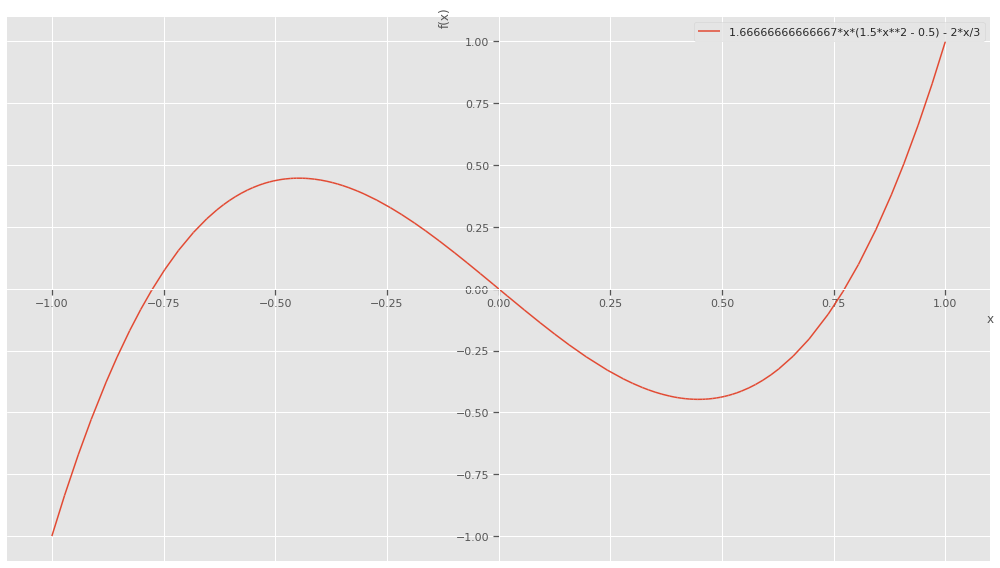

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 8
style.use('ggplot')
plot(f,(x,-1,1),legend=True)

In [ ]:
f1=Legendre(1)
f2=simplify(Legendre(3))

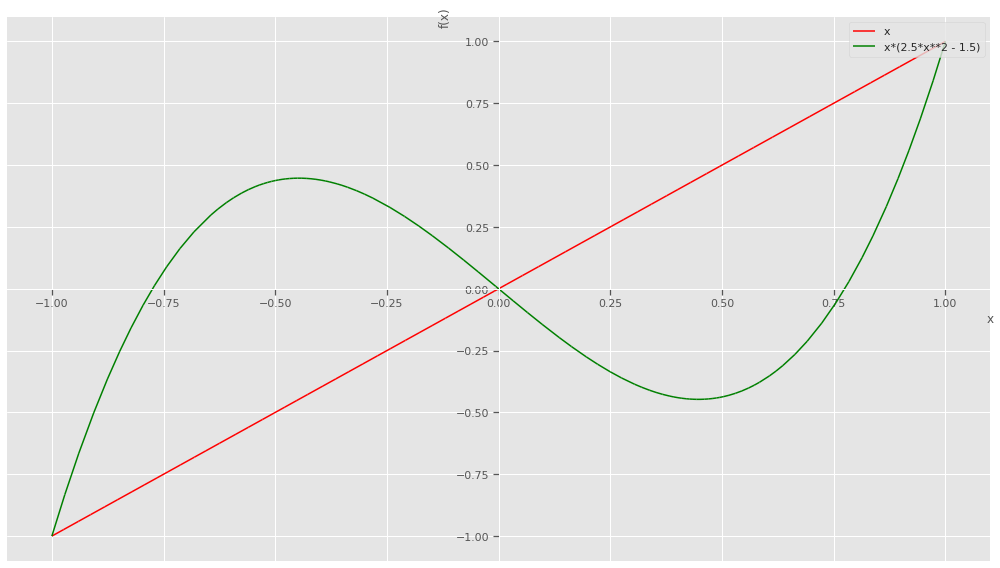

In [ ]:
pl=plot(f1,f2,(x,-1,1),legend=True,show=False)
pl[0].line_color = 'red'
pl[1].line_color = 'green'
pl.show()

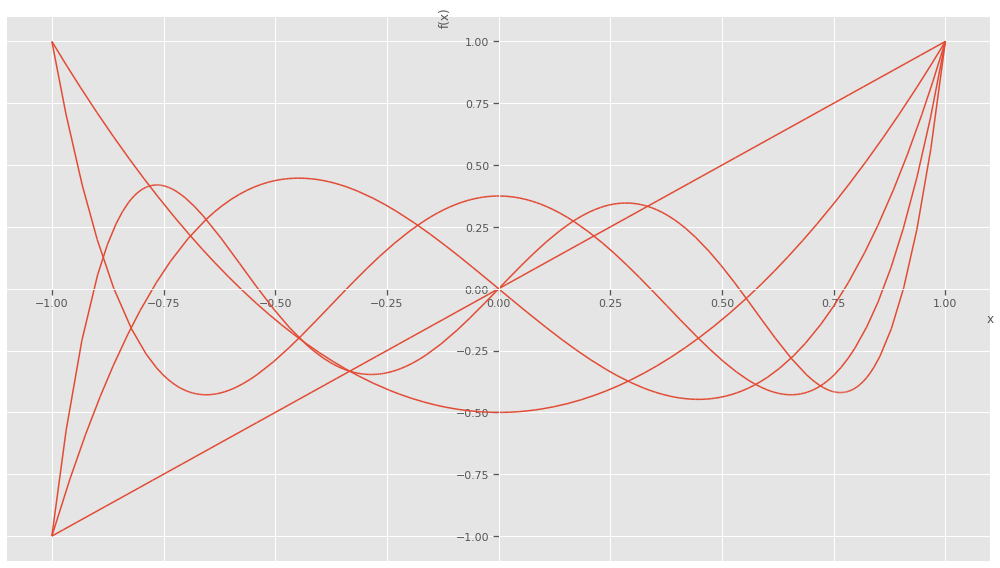

In [ ]:
plot(Legendre(1),Legendre(2),Legendre(3),Legendre(4),Legendre(5),(x,-1,1))

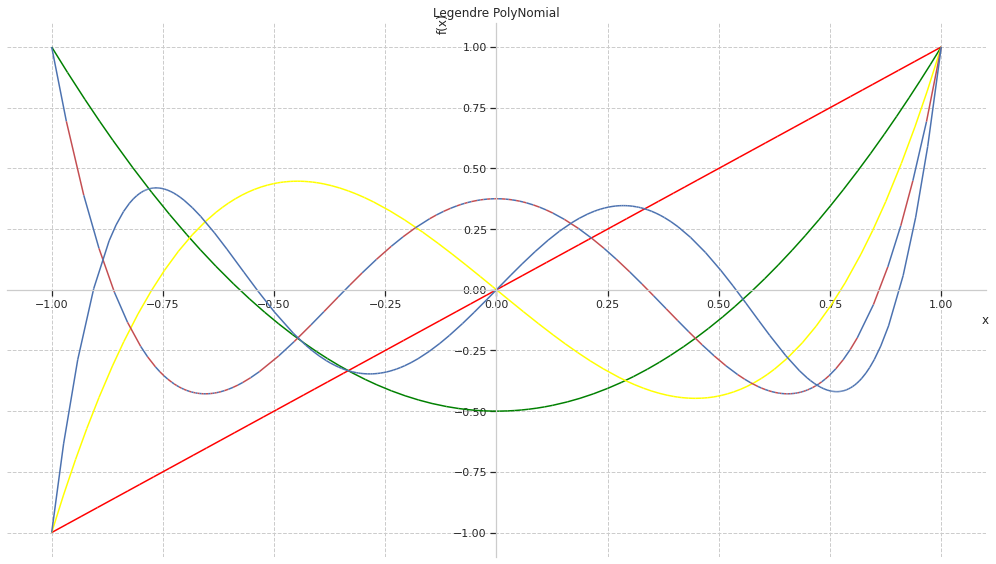

In [ ]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
p=plot(Legendre(1),Legendre(2),Legendre(3),Legendre(4),Legendre(5),(x,-1,1),title='Legendre PolyNomial',show=False);
p[0].line_color = 'red'
p[1].line_color = 'green'
p[2].line_color = 'yellow'
p[3].line_color = ['b','r']
p.figsize=(14, 8)
p.show()

## Legedre Roots
* the $i-th$ Gauss node, $x_i$, is the $i-th$ root of $P_n$ and the weights are given by the formula (Abramowitz & Stegun 1972)

$${\displaystyle w_{i}={\frac {2}{\left(1-x_{i}^{2}\right)\left[P'_{n}(x_{i})\right]^{2}}}.}$$


* The first guess ${\displaystyle x_{0}}$ for the ${\displaystyle i}$-th root of a ${\displaystyle n}$-order polynomial ${\displaystyle P_{n}}$ can be given by
$${\displaystyle x_{0}=\cos \left({\frac {\pi (i-1/4)}{n+1/2}}\right)}$$

* Newton–Raphson method

$${\displaystyle x_{1}=x_{0}-{\frac {f(x_{0})}{f'(x_{0})}}}$$

In [ ]:
def LegendreRoots(polyorder,tolerance=1e-20):
  """
  =====================================================
  LegendreRoots(polyorder,tolerance=1e-20)

  polyorder: Order of polynomial(>2)
  tolerance: tolerance of error (default: 1e-20)
  Output: [roots, err]
  This function return Roots of Legendre polynomial
  =====================================================
  """
  if polyorder<2:
    err=1
                                                      # bad polyorder no roots can be found
  else:
    roots=[]
		                                                  # The polynomials are alternately even and odd functions. 
                                                      # So we evaluate only half the number of roots. 
    for i in range(1,int((polyorder)/2) +1):
      x1=cos(pi*(i-0.25)/(polyorder+0.5))
      error=10*tolerance
      iters=0

      while (error>tolerance) and (iters<1000):
        dx=-Legendre(polyorder)/DLegendre(polyorder)
        dx=N(dx.subs(x,x1))
        x1=N(x1+dx)
        iters=iters+1
        error=abs(dx)

      #print(roots)
      roots.append(x1)
      #print(roots)
		                                                            # Use symmetry to get the other roots
    roots=np.array(roots)
    if polyorder%2==0:
      roots=np.concatenate( (-1.0*roots, roots[::-1]) )

    else:
      roots=np.concatenate( (-1.0*roots, [0.0], roots[::-1]) )

    err=0
                                                           # successfully determined roots
  return [roots, err]

In [ ]:
print(LegendreRoots.__doc__)


  LegendreRoots(polyorder,tolerance=1e-20)

  polyorder: Order of polynomial(>2)
  tolerance: tolerance of error (default: 1e-20)
  Output: [roots, err]
  This function return Roots of Legendre polynomial
  


In [ ]:
LegendreRoots(5)

[array([-0.906179845938664, -0.538469310105683, 0.0, 0.538469310105683,
        0.906179845938664], dtype=object), 0]

In [ ]:
LegendreRoots(2)

[array([-0.577350269189626, 0.577350269189626], dtype=object), 0]

## Weight Coefficient

In [ ]:
def GaussLegendreWeights(polyorder):
  """
  =====================================================
  GaussLegendreWeights(polyorder)

  polyorder: Order of polynomial
  Output: [W, xis, err]
  This function return Weights(W) and Roots(xis) of Legendre polynomial
  =====================================================
  """
  W=[]
  [xis,err]=LegendreRoots(polyorder)
  xis=list(xis)
  if err==0:
    for x1 in xis:
      w=2.0/( (1.0-x**2)*(DLegendre(polyorder)**2) )
      w=w.subs(x,x1)
      W.append(w)
      err=0
  else:
    err=1 # could not determine roots - so no weights
  return [W, xis, err]

In [ ]:
print(GaussLegendreWeights.__doc__)


  GaussLegendreWeights(polyorder)

  polyorder: Order of polynomial
  Output: [W, xis, err]
  This function return Weights(W) and Roots(xis) of Legendre polynomial
  


In [ ]:
GaussLegendreWeights(2)

[[1.00000000000000, 1.00000000000000],
 [-0.577350269189626, 0.577350269189626],
 0]

## Function Plot Legendre Polynomial

In [ ]:
def PlotLegendre(polyorder):
  """
  =====================================================
  PlotLegendre(polyorder)

  This function plot legendre plynomial
  =====================================================
  """
  sns.set()
  sns.set_style("whitegrid", {'grid.linestyle': '--'})
  plot(Legendre(polyorder),(x,-1,1))


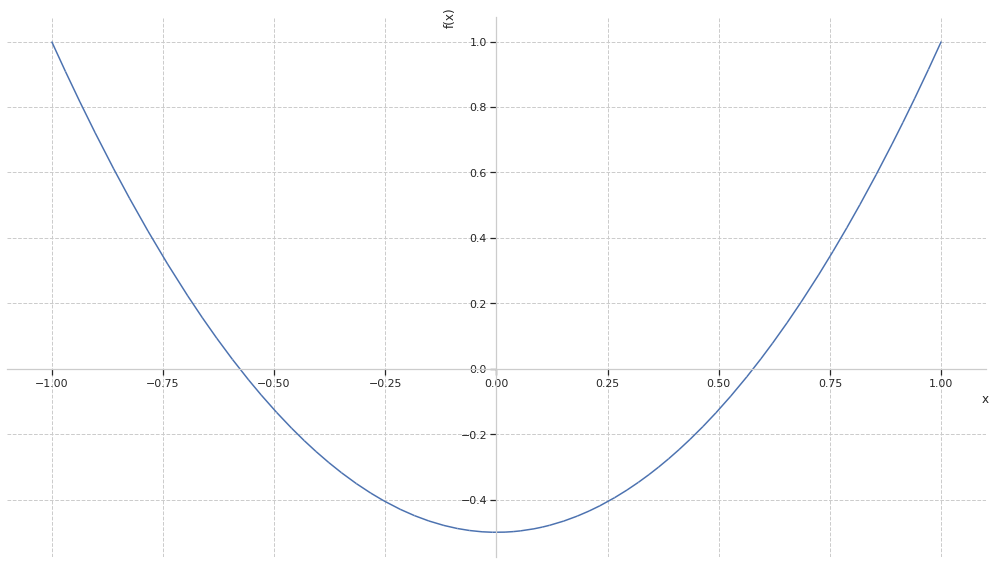

In [ ]:
PlotLegendre(2)

## Final Result

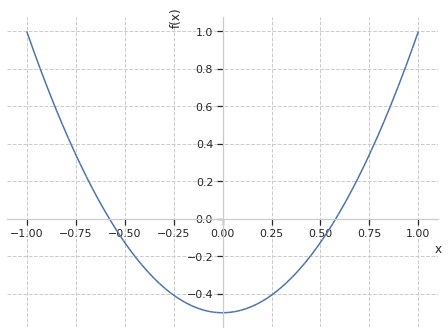

order: 2
Weights: [1.00000000000000, 1.00000000000000]
Roots    :  [-0.577350269189626, 0.577350269189626]





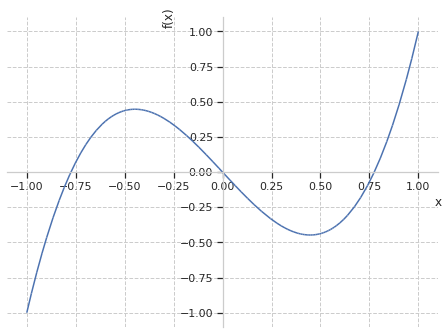

order: 3
Weights: [0.555555555555556, 0.888888888888889, 0.555555555555556]
Roots    :  [-0.774596669241483, 0.0, 0.774596669241483]





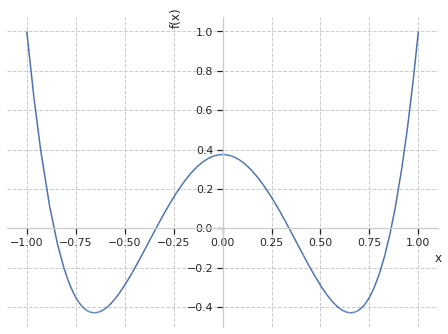

order: 4
Weights: [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]
Roots    :  [-0.861136311594053, -0.339981043584856, 0.339981043584856, 0.861136311594053]





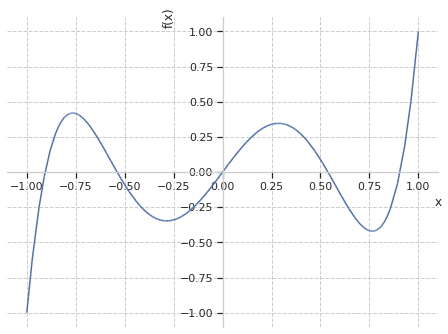

order: 5
Weights: [0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]
Roots    :  [-0.906179845938664, -0.538469310105683, 0.0, 0.538469310105683, 0.906179845938664]





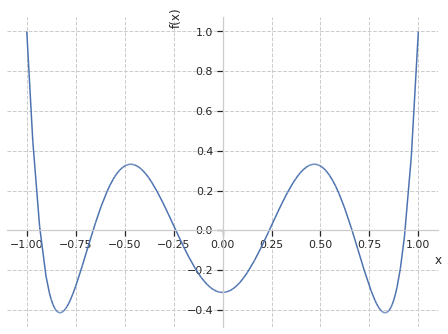

order: 6
Weights: [0.171324492379171, 0.360761573048138, 0.467913934572691, 0.467913934572691, 0.360761573048138, 0.171324492379171]
Roots    :  [-0.932469514203152, -0.661209386466265, -0.238619186083197, 0.238619186083197, 0.661209386466265, 0.932469514203152]





In [ ]:
for Polyorder in range(2,7):
  plt.rcParams['figure.figsize'] = 6.4, 4.8
  plot(Legendre(Polyorder),(x,-1,1))

  [W, xis, err]=GaussLegendreWeights(Polyorder)
  print("order:", Polyorder)
  print("Weights:", W)
  print ("Roots    : ",xis)

  print('='*110)
  print('\n\n')
  print('='*110)



---



# Values of Shape Function at Gauss Points (Legendre root)

Pramod Kumar Yadav (iampramodyadav)



---



In [ ]:
def ShapeLegRoot(p):
  """
  =====================================================
  ShapeLegRoot(p)

  p : order of approximation (integer)
  
  Output: [n, W, xis, ShapeValueXi, dShapeValueXi]
  Here,
  n-    Order of gauss legendre polynomial
  W-    Legendre Weights
  xis-  Gauss point coordinates (real)
  ShapeValueXi-   Value of shape function at  at all the  Xi (real)(Legendre Roots)
  ShapeValueXi-   Value of derivative of shape function at Gauss points Xi(Legendre Roots) 
  =====================================================
  """

  p=int(p)

  pbar=max(2*p, p+2) 
  if pbar%2!=0:                                   #if odd
    n=(pbar+1)/2
  else:
    n=(pbar+2)/2

  n=int(n)

  #print("Order of gauss legendre polynomial:",n)

  [W, xis, err]=GaussLegendreWeights(n)           #order: Polyorder(n), Weights:  W, Roots: xis

  ShapeValueXi=np.zeros((n, p+1))
  dShapeValueXi=np.zeros((n, p+1))

  #print('ndofel(p+1):',p+1)
  #print('Shape of shape value matrix:',ShapeValueXi.shape)

  s=SHAPE(p)
  ds=dSHAPE(p)

  for i in range(0,n):
    for j in range(0,p+1):

      ShapeValueXi[i][j]=s[j].subs(z,xis[i])          #w.subs(x,x1)
      dShapeValueXi[i][j]=ds[j].subs(z,xis[i])

  return [n, W, xis, ShapeValueXi, dShapeValueXi]

In [ ]:
print(ShapeLegRoot.__doc__)


  ShapeLegRoot(p)

  p : order of approximation (integer)
  Output: [n, W, xis, ShapeValueXi, dShapeValueXi]
  Here,
  n-    Order of gauss legendre polynomial
  W-    Legendre Weights
  xis-  Gauss point coordinates (real)
  ShapeValueXi-   Value of shape function at  at all the  Xi (real)(Legendre Roots)
  ShapeValueXi-   Value of derivative of shape function at Gauss points Xi(Legendre Roots) 
  




---



In [ ]:
ShapeLegRoot(1)

[2,
 [1.00000000000000, 1.00000000000000],
 [-0.577350269189626, 0.577350269189626],
 array([[0.78867513, 0.21132487],
        [0.21132487, 0.78867513]]),
 array([[-0.5,  0.5],
        [-0.5,  0.5]])]

In [ ]:
[n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(2)

In [ ]:
dShapeValueXi

array([[-1.27459667,  1.54919334, -0.27459667],
       [-0.5       ,  0.        ,  0.5       ],
       [ 0.27459667, -1.54919334,  1.27459667]])

In [ ]:
ShapeValueXi

array([[ 0.68729833,  0.4       , -0.08729833],
       [ 0.        ,  1.        ,  0.        ],
       [-0.08729833,  0.4       ,  0.68729833]])

In [ ]:
W

[0.555555555555556, 0.888888888888889, 0.555555555555556]

# Element Calculation

* Here linear mapping function used between the physical coordinate (x) and the natural coordinate $\xi$ (here, z) :

  * ![](https://i.imgur.com/2yMRAeP.png)

  * Hence, $x_1^k$ (xL) and $x_{p+1}^k$ (xR) are the coordinates of the end nodes of the element $k$ and $p$ denotes the order of approximation.

## Local K, and fi

In [ ]:
def ElemKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0):
  """
  =====================================================
  ElemKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

  k :   element number (integer)
  p :   order of approximation (integer)
  xL :  x -coordinate of the left end of the element (real)
  xR :  x -coordinate of the right end of the element (real)
  E :   Young's modules ( E ) of the bar material which is taken as constant (real)
  a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
  f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

  Output: [Ke, fe]
  Ke : element stiffness matrix (real)
  fe : element force vector (real)
  =====================================================
  """

  Ke=np.zeros((p+1,p+1))  # size of element matrix
  h=xR - xL               # h : element length (real)

  [n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(p)
  fe=np.zeros(p+1)

  for m in range(0,n):
    xi=xis[m]
    x = xL*(1 - z)/2 + xR*(1 + z)/2

    EA = E*(a0 + a1*x+a2*(x**2))
    EA = EA.subs(z,xi)

    f = f0 + f1*x + f2*x*x
    f=f.subs(z,xi)

    for i in range(0, p+1):
      fe[i] = fe[i] + f*ShapeValueXi[m][i]*(h/2)*W[m]

      for j in range(0,p+1):
        Ke[i][j] = Ke[i][j]+EA*dShapeValueXi[m][i]*dShapeValueXi[m][j]*(2/h)*W[m]

  return [Ke, fe]

In [ ]:
print(ElemKfi.__doc__)


  ElemKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

  k :   element number (integer)
  p :   order of approximation (integer)
  xL :  x -coordinate of the left end of the element (real)
  xR :  x -coordinate of the right end of the element (real)
  E :   Young's modules ( E ) of the bar material which is taken as constant (real)
  a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
  f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

  Output: [Ke, fe]
  Ke : element stiffness matrix (real)
  fe : element force vector (real)
  




---



## Example:1



In [ ]:
ElemKfi(k=1,p=1,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30)

[array([[ 16.5, -16.5],
        [-16.5,  16.5]]), array([0., 0.])]

In [ ]:
ElemKfi(k=1,p=1,xL=10,xR=20,a0=6,a1=-0.1,E=30)

[array([[ 13.5, -13.5],
        [-13.5,  13.5]]), array([0., 0.])]

In [ ]:
ElemKfi(k=1,p=1,xL=20,xR=30,a0=6,a1=-0.1,E=30)

[array([[ 10.5, -10.5],
        [-10.5,  10.5]]), array([0., 0.])]

## Example:2
- book:
Fundamentals of Finite Element Analysis
Linear Finite Element Analysis-Ioannis Koutromanos
- example-33.2
- page-87/729

In [ ]:
ElemKfi(k=1,p=1,xL=0,xR=5,a0=1,a1=0,a2=1/400,E=5000)   #for element-1

[array([[ 1020.83333333, -1020.83333333],
        [-1020.83333333,  1020.83333333]]), array([0., 0.])]

In [ ]:
ElemKfi(k=1,p=1,xL=5,xR=20,a0=1,a1=0,a2=1/400,E=5000)   #for element-2

[array([[ 479.16666667, -479.16666667],
        [-479.16666667,  479.16666667]]), array([0., 0.])]

**Stiffeness and Force**

In [ ]:
ElemKfi(k=1,p=1,xL=0,xR=5,E=5000,a0=1,a1=0,a2=1/400,f0=2)

[array([[ 1020.83333333, -1020.83333333],
        [-1020.83333333,  1020.83333333]]), array([5., 5.])]

In [ ]:
ElemKfi(k=1,p=1,xL=5,xR=20,E=5000,a0=1,a1=0,a2=1/400,f0=2)

[array([[ 479.16666667, -479.16666667],
        [-479.16666667,  479.16666667]]), array([15., 15.])]

## Global K,fi if element devided in equal size

In [ ]:
def GlobelKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0):

  """
  =====================================================
    Note: For elements of equal length

    GlobelKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

    k :   number of elements (integer)
    p :   order of approximation (integer)
    xL :  x -coordinate of the left end of the element (real)
    xR :  x -coordinate of the right end of the element (real)
    E :   Young's modules ( E ) of the bar material which is taken as constant (real)
    a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
    f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

    Output: [Kg, fg]
    Kg : Globel stiffness matrix (real)
    fg : Globel force vector (real)
  =====================================================
  """

  Kg=np.zeros(((k+1)*p,(k+1)*p))  #size of element matrix
  h=xR - xL

  [n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(p)
  fg=np.zeros((k+1)*p)

  for e in range(0,k*p,p):
    for m in range(0,n):
      xi=xis[m]
      x = (xL+h*e)*(1 - z)/2 + (xR+h*e)*(1 + z)/2

      EA = E*(a0 + a1*x+a2*(x**2))
      EA = EA.subs(z,xi)

      f = f0 + f1*x + f2*x*x
      f=f.subs(z,xi)

      for i in range(0, p+1):
        fg[i+e] = fg[i+e] + f*ShapeValueXi[m][i]*(h/2)*W[m]

        for j in range(0,p+1):
          Kg[i+e][j+e] = Kg[i+e][j+e]+EA*dShapeValueXi[m][i]*dShapeValueXi[m][j]*(2/h)*W[m]

  return [Kg, fg]

In [ ]:
print(GlobelKfi.__doc__)


    Note: For elements of equal length

    GlobelKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

    k :   number of elements (integer)
    p :   order of approximation (integer)
    xL :  x -coordinate of the left end of the element (real)
    xR :  x -coordinate of the right end of the element (real)
    E :   Young's modules ( E ) of the bar material which is taken as constant (real)
    a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
    f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

    Output: [Kg, fg]
    Kg : Globel stiffness matrix (real)
    fg : Globel force vector (real)
  




---



In [ ]:
GlobelKfi(k=3,p=1,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30)

[array([[ 16.5, -16.5,   0. ,   0. ],
        [-16.5,  30. , -13.5,   0. ],
        [  0. , -13.5,  24. , -10.5],
        [  0. ,   0. , -10.5,  10.5]]), array([0., 0., 0., 0.])]

In [ ]:
GlobelKfi(k=1,p=2,xL=0,xR=30,a0=6,a1=-0.1,a2=0,E=30)

[array([[ 12.5, -14. ,   1.5,   0. ],
        [-14. ,  24. , -10. ,   0. ],
        [  1.5, -10. ,   8.5,   0. ],
        [  0. ,   0. ,   0. ,   0. ]]), array([0., 0., 0., 0.])]

In [ ]:
GlobelKfi(k=3,p=2,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30)

[array([[ 40.5, -46. ,   5.5,   0. ,   0. ,   0. ,   0. ,   0. ],
        [-46. ,  88. , -42. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  5.5, -42. ,  63. , -30. ,   3.5,   0. ,   0. ,   0. ],
        [  0. ,   0. , -30. ,  56. , -26. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   3.5, -26. ,  35. , -14. ,   1.5,   0. ],
        [  0. ,   0. ,   0. ,   0. , -14. ,  24. , -10. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   1.5, -10. ,   8.5,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ]]),
 array([0., 0., 0., 0., 0., 0., 0., 0.])]

In [ ]:
GlobelKfi(k=1,p=1,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30)

[array([[ 16.5, -16.5],
        [-16.5,  16.5]]), array([0., 0.])]

In [ ]:
ElemKfi(k=1,p=1,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30)

[array([[ 16.5, -16.5],
        [-16.5,  16.5]]), array([0., 0.])]



---

